## Visualize Match Data

Data source: https://www.kaggle.com/martj42/international-football-results-from-1872-to-2017

In [11]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('svg')
%matplotlib inline
plt.style.use('ggplot')

In [13]:
dataset = pd.read_csv('data/original/results.csv')
dataset["date"] = pd.to_datetime(dataset["date"])
print(dataset.head(2))
print(dataset.tail(2))
print(dataset.shape)

        date home_team away_team  home_score  away_score tournament     city  \
0 1872-11-30  Scotland   England           0           0   Friendly  Glasgow   
1 1873-03-08   England  Scotland           4           2   Friendly   London   

    country  neutral  
0  Scotland    False  
1   England    False  
            date home_team  away_team  home_score  away_score tournament  \
39050 2018-06-12     Japan   Paraguay           4           2   Friendly   
39051 2018-06-12    Poland  Lithuania           4           0   Friendly   

            city  country  neutral  
39050  Innsbruck  Austria    False  
39051     Warsaw   Poland    False  
(39052, 9)


### Histogram of home goals, away goals, goal diff

In [8]:
def get_count_for_column_values(col_name):
    return dataset.groupby(col_name).count().iloc[:,0:1].rename(columns={"date": "count"}).reset_index()

<Figure size 1440x432 with 0 Axes>

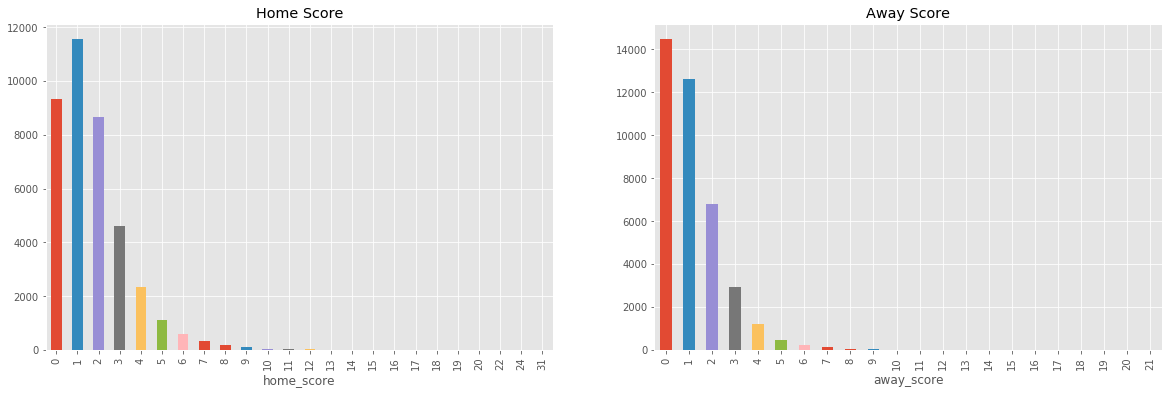

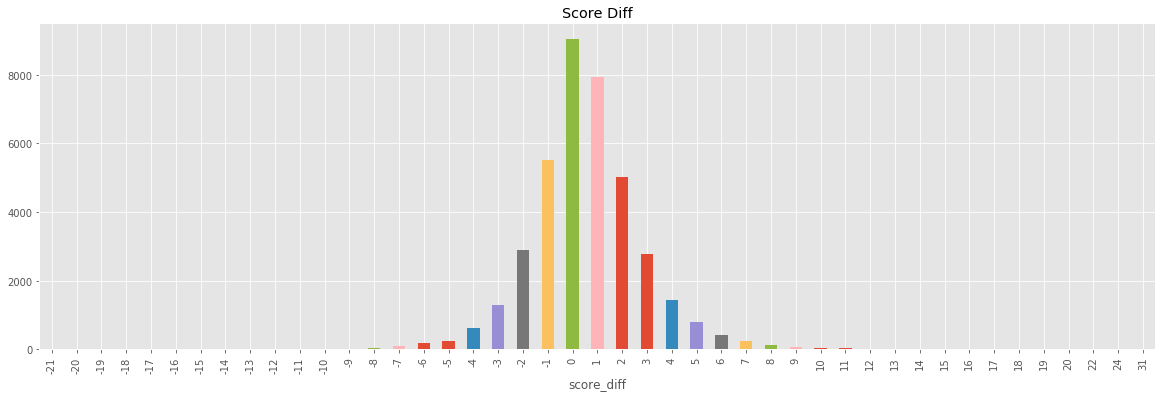

In [9]:
plt.figure(figsize=(20, 6))
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))

# Home score
home_scores = get_count_for_column_values("home_score")
home_scores.plot.bar(x="home_score", y="count", ax=axes[0], legend=False)
axes[0].set_title('Home Score')

# Away score
away_scores = get_count_for_column_values("away_score")
away_scores.plot.bar(x="away_score", y="count", ax=axes[1],legend=False)
axes[1].set_title('Away Score')

# Score Diff
dataset["score_diff"] = dataset["home_score"] - dataset["away_score"]
score_diff = get_count_for_column_values("score_diff")
score_diff.plot.bar(x="score_diff", y="count",legend=False, title='Score Diff', figsize=(20, 6))


### Win/Draw/Lose (Home)

[Text(0,0,'Away Win'), Text(0,0,'Draw'), Text(0,0,'Home Win')]

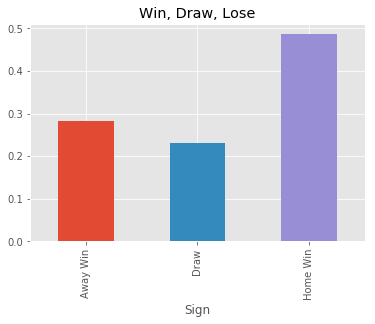

In [10]:
dataset["Sign"] = np.sign(dataset["home_score"] - dataset["away_score"])
home_win = get_count_for_column_values("Sign")
home_win["ratio"] = home_win["count"] / dataset.shape[0]
ax = home_win.plot.bar(x="Sign", y="ratio", legend=False, title='Win, Draw, Lose')
ax.set_xticklabels(["Away Win", "Draw", "Home Win"])

## Average goals

In [82]:
print("AVG home score", dataset["home_score"].mean())
print("AVG away score", dataset["away_score"].mean())
print("AVG goal diff", (dataset["home_score"] - dataset["away_score"]).mean())

AVG home score 1.7401302297
AVG away score 1.18009126333
AVG goal diff 0.560038966366


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
result,1 - 0,1 - 1,0 - 0,2 - 0,2 - 1,0 - 1,1 - 2,3 - 0,0 - 2,2 - 2,3 - 1,4 - 0,1 - 3,0 - 3,3 - 2,4 - 1
count,3993,3919,3209,3067,2997,2728,2023,1832,1738,1577,1514,1024,906,834,793,773
ratio,0.102364,0.100467,0.0822652,0.0786249,0.0768304,0.0699344,0.0518612,0.0469647,0.044555,0.0404276,0.0388126,0.026251,0.023226,0.0213802,0.0203292,0.0198164


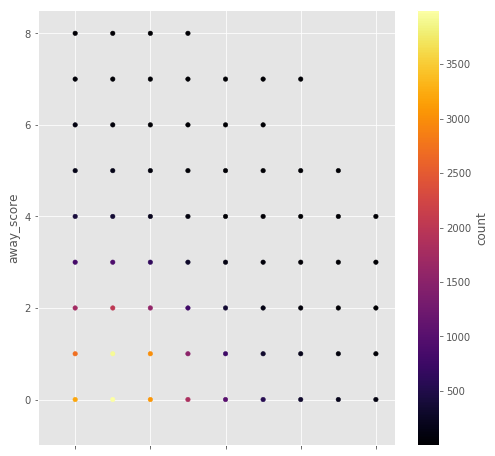

In [137]:
score_df = get_count_for_column_values(["home_score", "away_score"])
ax = score_df.plot.scatter(x="home_score", y="away_score", c="count",
                     colormap='inferno', figsize=(8, 8))
ax.set_xlim([-1, 8.5])
ax.set_ylim([-1, 8.5])

score_df["result"] = score_df[['home_score', 'away_score']].astype(str).apply(lambda x: ' - '.join(x), axis=1)
score_df["ratio"] = score_df["count"] / dataset.shape[0] 
score_df = score_df.sort_values(["count"], ascending=False).reset_index()
score_df.head(16)[["result", "count", "ratio"]].T

## Tournaments

#### International

| Tournament       | Qualifier                     |
| -------------    | -------------                 |
| FIFA World Cup   | FIFA World Cup qualification  |
| Confederations Cup     | -                 |

#### ACF
| Tournament       | Qualifier                     |
| -------------    | -------------                 |
| AFC Asian Cup   | AFC Asian Cup qualification  |
| AFC Challenge Cup     | AFC Challenge Cup qualification|

#### CAF
| Tournament       | Qualifier                     |
| -------------    | -------------                 |
| African Cup of Nations   | African Cup of Nations qualification  |

#### CONCACAF
| Tournament       | Qualifier                     |
| -------------    | -------------                 |
| Gold Cup   | Gold Cup qualification  |
| CONCACAF Championship     | CONCACAF Championship qualification|

#### CONMEBOL
| Tournament       | Qualifier                     |
| -------------    | -------------                 |
| Copa America   | -  |

#### OFC
| Tournament       | Qualifier                     |
| -------------    | -------------                 |
| Oceania Nations Cup   | Oceania Nations Cup qualification |

#### UEFA
| Tournament       | Qualifier                     |
| -------------    | -------------                 |
| UEFA Euro   | UEFA Euro qualification |

In [141]:
tournaments = ["FIFA World Cup", "FIFA World Cup qualification", "Confederations Cup",
               "AFC Asian Cup", "AFC Asian Cup qualification", "AFC Challenge Cup", "AFC Challenge Cup qualification",
               "African Cup of Nations", "African Cup of Nations qualification",
               "Gold Cup", "Gold Cup qualification", "CONCACAF Championship", "CONCACAF Championship qualification",
               "Copa America",
               "Oceania Nations Cup", "Oceania Nations Cup qualification",
               "UEFA Euro qualification", "UEFA Euro"]

for tournament in tournaments:
    c = dataset[dataset["tournament"] == tournament].shape[0]
    print(f"{tournament} game count: {c}")

FIFA World Cup game count: 836
FIFA World Cup qualification game count: 7100
Confederations Cup game count: 140
AFC Asian Cup game count: 319
AFC Asian Cup qualification game count: 724
AFC Challenge Cup game count: 100
AFC Challenge Cup qualification game count: 92
African Cup of Nations game count: 638
African Cup of Nations qualification game count: 1558
Gold Cup game count: 296
Gold Cup qualification game count: 56
CONCACAF Championship game count: 49
CONCACAF Championship qualification game count: 21
Copa America game count: 787
Oceania Nations Cup game count: 101
Oceania Nations Cup qualification game count: 70
UEFA Euro qualification game count: 2332
UEFA Euro game count: 286


## How many goals on average

In [276]:
def plot_goal_averages(team):
    data = dataset[(dataset["home_team"] == team) | (dataset["away_team"] == team)]
    print("jou")
    data["goals"] = data.apply(lambda r: r["home_score"] if r["home_team"] == team else r["away_score"], axis=1)
    print("moi")
    data = data.set_index("date")
    data["10match"] = data["goals"].rolling(10).mean()
    data["100match"] = data["goals"].rolling(100,  min_periods=10).mean() 
    data["1Year"] = data["goals"].rolling(window='365D', min_periods=1).mean()
    data["2Year"] = data["goals"].rolling(window='730D', min_periods=1).mean()
    data["4Year"] = data["goals"].rolling(window='1460D', min_periods=1).mean()

    data = data.tail(300)
    data = data.reset_index()
    ax = data.plot(y=["10match", "100match", "1Year", "2Year", "4Year"], figsize=(10, 10))
    data.plot(x='date', y="goals", kind='bar', ax=ax, width=0.01, legend=False)
    ax1 = plt.axes()
    x_axis = ax1.axes.get_xaxis()
    x_axis.set_visible(False)

jou


/Users/villetoiviainen/anaconda3/envs/dippa/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/Users/villetoiviainen/anaconda3/envs/dippa/lib/python3.6/site-packages/pandas/plotting/_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


moi


/Users/villetoiviainen/anaconda3/envs/dippa/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


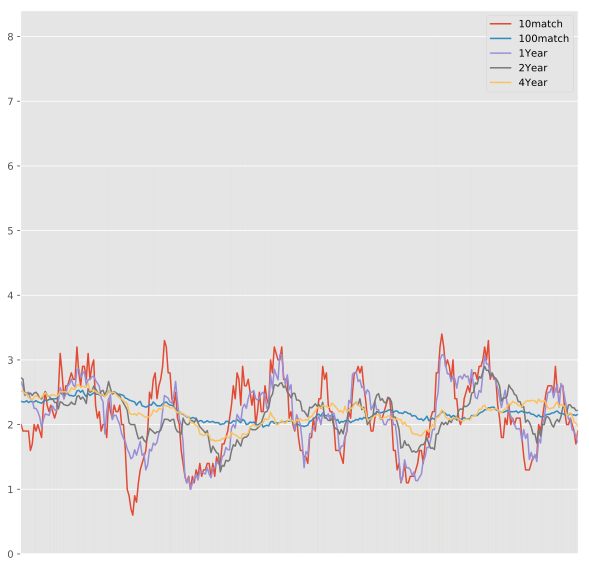

In [275]:
plot_goal_averages("Brazil")

/Users/villetoiviainen/anaconda3/envs/dippa/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/villetoiviainen/anaconda3/envs/dippa/lib/python3.6/site-packages/pandas/plotting/_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label
/Users/villetoiviainen/anaconda3/envs/dippa/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a n

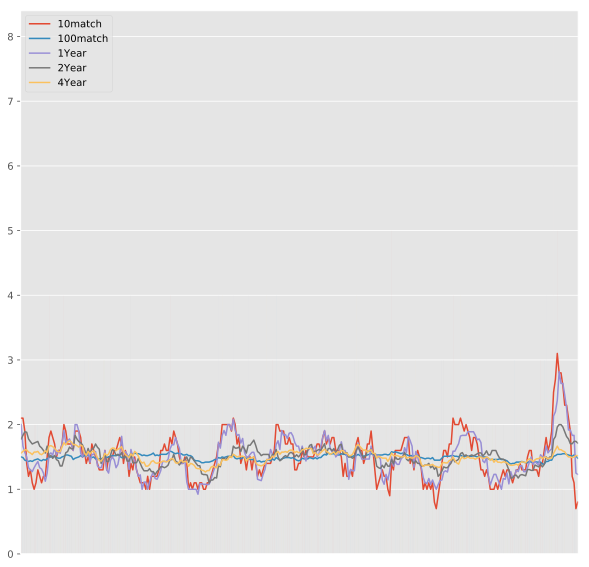

In [254]:
plot_goal_averages("Italy")

/Users/villetoiviainen/anaconda3/envs/dippa/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/villetoiviainen/anaconda3/envs/dippa/lib/python3.6/site-packages/pandas/plotting/_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label
/Users/villetoiviainen/anaconda3/envs/dippa/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a n

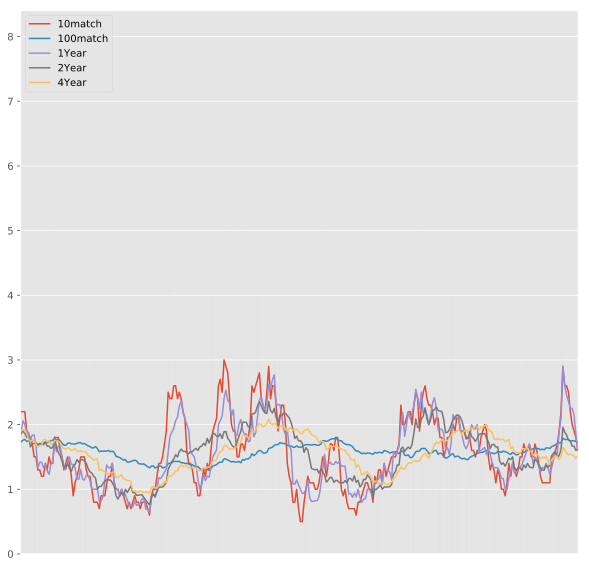

In [255]:
plot_goal_averages("Sweden")

/Users/villetoiviainen/anaconda3/envs/dippa/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/villetoiviainen/anaconda3/envs/dippa/lib/python3.6/site-packages/pandas/plotting/_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label
/Users/villetoiviainen/anaconda3/envs/dippa/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a n

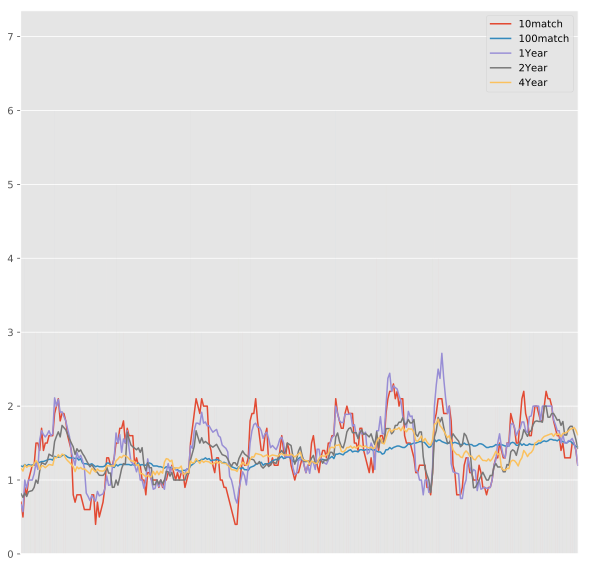

In [240]:
plot_goal_averages("Senegal")

/Users/villetoiviainen/anaconda3/envs/dippa/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/villetoiviainen/anaconda3/envs/dippa/lib/python3.6/site-packages/pandas/plotting/_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label
/Users/villetoiviainen/anaconda3/envs/dippa/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a n

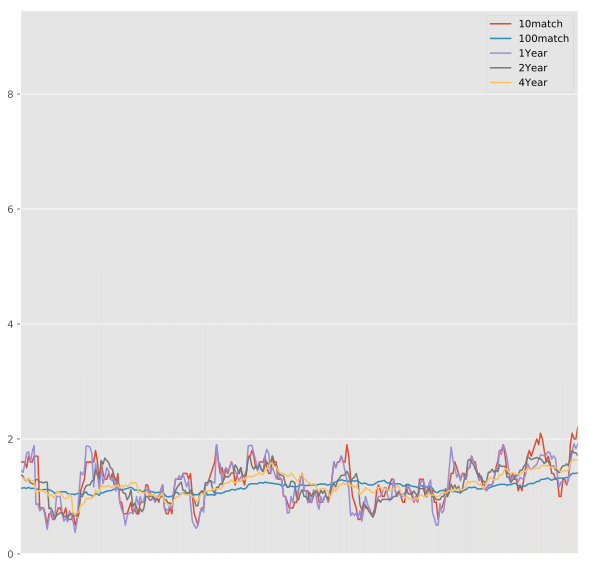

In [256]:
plot_goal_averages("Iceland")

/Users/villetoiviainen/anaconda3/envs/dippa/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/villetoiviainen/anaconda3/envs/dippa/lib/python3.6/site-packages/pandas/plotting/_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label
/Users/villetoiviainen/anaconda3/envs/dippa/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a n

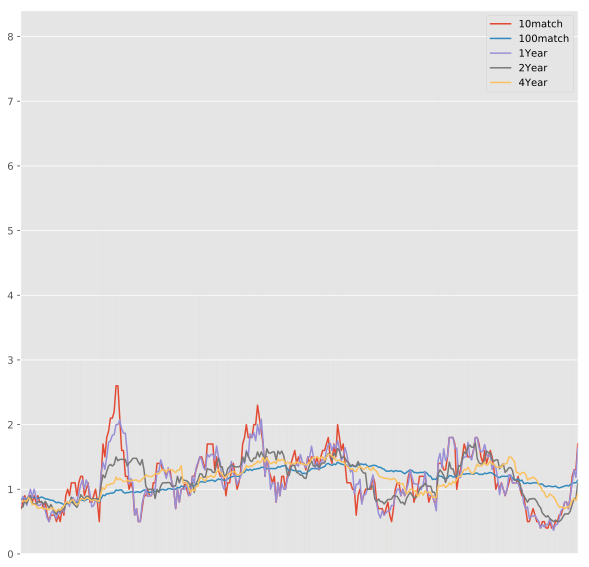

In [257]:
plot_goal_averages("Finland")